<a href="https://colab.research.google.com/github/whynotkush/Computer-Vision/blob/main/pretrained_EfficientNetB0_Food_dataset_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> <center> Vaibhav Gupta </center> </h1>
<h1> <center> 2020201040 </center> </h1>

## Download Necessary Packages 📚

In [ ]:
!pip install aicrowd-cli

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Download Data
The first step is to download out train test data. We will be training a model on the train data and make predictions on test data. We submit our predictions.


In [ ]:
API_KEY = "fd1aed7204268f0bae2780fb808a4063" #Please enter your API Key from [https://www.aicrowd.com/participants/me]
!aicrowd login --api-key $API_KEY

API Key valid
Saved API Key successfully!


In [ ]:
!aicrowd dataset download --challenge chunin-exams-food-track-cv-2021

train_images.zip: 100% 754M/754M [00:07<00:00, 98.9MB/s]
test_images.zip: 100% 33.9M/33.9M [00:00<00:00, 81.3MB/s]
train.csv: 100% 253k/253k [00:00<00:00, 3.68MB/s]
test.csv: 100% 7.27k/7.27k [00:00<00:00, 851kB/s]


Unzip the data into folders

In [ ]:
!mkdir data
!mkdir data/test
!mkdir data/train
!unzip train_images -d data/train
!unzip test_images -d data/test

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import os

Reading train.csv

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
train = train.sample(frac = 1)

In [ ]:
train.head()

,ImageId,ClassName
426,953395f7bf.jpg,hard-cheese
5875,922cec919a.jpg,tomato-sauce
6801,5bd4c627f0.jpg,wine-white
5039,1f999a132b.jpg,croissant
6955,b3750e65a0.jpg,rice


Reading test.csv

In [ ]:
test_csv = pd.read_csv('test.csv')

In [ ]:
test_csv.head()

,ImageId
0,90e63a2fde.jpg
1,a554d1ca8d.jpg
2,48317e8ee8.jpg
3,79528df667.jpg
4,6d2f2f63f5.jpg


Encoding Target labels with sklearn.preprocessing.LabelEncoder

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
fitted_ = le.fit(train['ClassName'])

In [ ]:
list_of_labels = fitted_.classes_

List of All unique labels 

In [ ]:
list_of_labels

array(['almonds', 'apple', 'avocado', 'banana', 'beer', 'biscuits',
       'boisson-au-glucose-50g', 'bread-french-white-flour',
       'bread-sourdough', 'bread-white', 'bread-whole-wheat',
       'bread-wholemeal', 'broccoli', 'butter', 'carrot', 'cheese',
       'chicken', 'chips-french-fries', 'coffee-with-caffeine', 'corn',
       'croissant', 'cucumber', 'dark-chocolate', 'egg',
       'espresso-with-caffeine', 'french-beans', 'gruyere', 'ham-raw',
       'hard-cheese', 'honey', 'jam', 'leaf-spinach', 'mandarine',
       'mayonnaise', 'mixed-nuts', 'mixed-salad-chopped-without-sauce',
       'mixed-vegetables', 'onion', 'parmesan', 'pasta-spaghetti',
       'pickle', 'pizza-margherita-baked', 'potatoes-steamed', 'rice',
       'salad-leaf-salad-green', 'salami', 'salmon', 'sauce-savoury',
       'soft-cheese', 'strawberries', 'sweet-pepper', 'tea', 'tea-green',
       'tomato', 'tomato-sauce', 'water', 'water-mineral',
       'white-coffee-with-caffeine', 'wine-red', 'wine-white'

In [ ]:
transformed_lol = le.transform(list_of_labels)

Transformed labels using LabelEncoder()

In [ ]:
transformed_lol

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

In [ ]:
le.inverse_transform(transformed_lol)

array(['almonds', 'apple', 'avocado', 'banana', 'beer', 'biscuits',
       'boisson-au-glucose-50g', 'bread-french-white-flour',
       'bread-sourdough', 'bread-white', 'bread-whole-wheat',
       'bread-wholemeal', 'broccoli', 'butter', 'carrot', 'cheese',
       'chicken', 'chips-french-fries', 'coffee-with-caffeine', 'corn',
       'croissant', 'cucumber', 'dark-chocolate', 'egg',
       'espresso-with-caffeine', 'french-beans', 'gruyere', 'ham-raw',
       'hard-cheese', 'honey', 'jam', 'leaf-spinach', 'mandarine',
       'mayonnaise', 'mixed-nuts', 'mixed-salad-chopped-without-sauce',
       'mixed-vegetables', 'onion', 'parmesan', 'pasta-spaghetti',
       'pickle', 'pizza-margherita-baked', 'potatoes-steamed', 'rice',
       'salad-leaf-salad-green', 'salami', 'salmon', 'sauce-savoury',
       'soft-cheese', 'strawberries', 'sweet-pepper', 'tea', 'tea-green',
       'tomato', 'tomato-sauce', 'water', 'water-mineral',
       'white-coffee-with-caffeine', 'wine-red', 'wine-white'

In [ ]:
targets = le.fit_transform(train['ClassName'])

In [ ]:
targets

array([28, 54, 59, ..., 58, 47, 38])

In [ ]:
ntrain = train.copy()

In [ ]:
ntrain['ClassName'] = targets

In [ ]:
ntrain.head()

,ImageId,ClassName
426,953395f7bf.jpg,28
5875,922cec919a.jpg,54
6801,5bd4c627f0.jpg,59
5039,1f999a132b.jpg,20
6955,b3750e65a0.jpg,43


DATALOADER

In [ ]:
train_img_lst , train_img_labels ,test_imgs = [],[],[]
for i in range(len(ntrain.to_numpy()) ) :
  train_img_lst.append('data/train/train_images/' + ntrain['ImageId'][i])
  train_img_labels.append(ntrain['ClassName'][i])

for i in range(len(test_csv.to_numpy())) :
  test_imgs.append('data/test/test_images/'+test_csv['ImageId'][i])

In [ ]:
train_img_lst[0]

'data/train/train_images/f27632d7e5.jpg'

In [ ]:
train_img_labels[0]

55

In [ ]:
test_imgs[0]

'data/test/test_images/90e63a2fde.jpg'

Reading images and resizing into 224,224

In [ ]:
import cv2
def img_read(img_path_list):
    resize_img_list = []
    for img_path in img_path_list:
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))
        resize_img_list.append(img)
    return np.array(resize_img_list)

In [ ]:
X_train = img_read(train_img_lst)
X_test = img_read(test_imgs)

In [ ]:
y_train = np.array(train_img_labels)

In [ ]:
X_train.shape

(9323, 224, 224, 3)

In [ ]:
X_test.shape

(484, 224, 224, 3)

In [ ]:
y_train.shape

(9323,)

### Plot Samples

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    lbl = le.inverse_transform([y[index]])
    plt.xlabel(lbl[0])

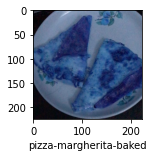

In [ ]:
plot_sample(X_train , y_train , 1)

### Pre-trained model EfficientNetB0

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

img_augmentation = Sequential(
    [
        preprocessing.RandomRotation(factor=0.15),
        preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
        preprocessing.RandomFlip(),
        preprocessing.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

In [ ]:
INPUT_SIZE = 224,224,3
from tensorflow.keras.applications import EfficientNetB0
x = img_augmentation(layers.Input(shape=INPUT_SIZE))
outputs = EfficientNetB0(include_top=True, weights=None, classes=61)(x)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
img_augmentation (Sequential (None, 224, 224, 3)       0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, 61)                4127712   
Total params: 4,127,712
Trainable params: 4,085,689
Non-trainable params: 42,023
_________________________________________________________________


In [ ]:
history = model.fit(X_train , y_train , epochs=1)

Epoch 1/12
292/292 [==============================] - 535s 2s/step - loss: 4.0463 - accuracy: 0.1257
Epoch 2/12
292/292 [==============================] - 543s 2s/step - loss: 3.1974 - accuracy: 0.2083
Epoch 3/12
292/292 [==============================] - 539s 2s/step - loss: 2.9008 - accuracy: 0.2567
Epoch 4/12
292/292 [==============================] - 513s 2s/step - loss: 2.7180 - accuracy: 0.2856
Epoch 5/12
292/292 [==============================] - 493s 2s/step - loss: 2.5744 - accuracy: 0.3095
Epoch 6/12
292/292 [==============================] - 483s 2s/step - loss: 2.4048 - accuracy: 0.3511
Epoch 7/12
292/292 [==============================] - 480s 2s/step - loss: 2.2684 - accuracy: 0.3745
Epoch 8/12
292/292 [==============================] - 479s 2s/step - loss: 2.1048 - accuracy: 0.4142
Epoch 9/12
292/292 [==============================] - 481s 2s/step - loss: 1.8138 - accuracy: 0.4771
Epoch 10/12
292/292 [==============================] - 578s 2s/step - loss: 1.6326 - accura

#### Plotting Epoch vs Accuracy graph

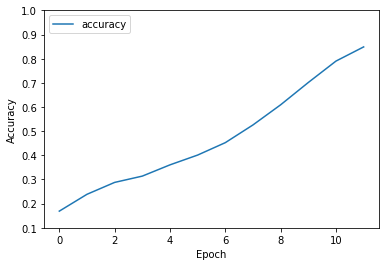

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='upper left')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred_pooling]

#### Plotting predicted Label for test image 55

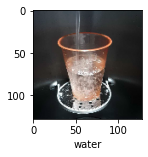

In [ ]:
plot_sample(X_test , y_classes_sgd , 55)

#### Creating submission.csv from Predicted y from X_test

In [ ]:
df = pd.DataFrame(le.inverse_transform(y_classes_pooling),columns=['ClassName'])
df.to_csv('submission.csv',index=False)

#### Code for downloading the submission.csv

In [ ]:
from google.colab import files
files.download('submission.csv')

## Making Direct Submission thought Aicrowd CLI

In [ ]:
!aicrowd submission create -c chunin-exams-food-track-cv-2021 -f submission.csv

submission.csv ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0% • 7.7/6.1 KB • ? • 0:00:00
                                               ╭─────────────────────────╮                                               
                                               │ Successfully submitted! │                                               
                                               ╰─────────────────────────╯                                               
                                                     Important links                                                     
┌──────────────────┬────────────────────────────────────────────────────────────────────────────────────────────────────┐
│  This submission │ https://www.aicrowd.com/challenges/chunin-exams-food-track-cv-2021/submissions/131078              │
│                  │                                                                                                    │
│  All submissions │ https://www.aicrowd.com/challenges/chunin-ex